In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('spotifyRefinedTarget.csv')

In [3]:
data.head(3)

,name,artists,percentage,danceability,energy,liveness,loudness,speechiness,tempo,mode2,acousticness,instrumentalness
0,Clancy Lowered the Boom,['Dennis Day'],0.660748,0.819,0.341,0.160,0.47559,0.4150,0.253900,0.25,0.732,0.000
1,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.506691,0.328,0.166,0.101,0.45150,0.0339,0.459746,0.25,0.961,0.913
2,Gati Mardika,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.619534,0.697,0.346,0.130,0.47494,0.0700,0.499267,0.25,0.579,0.168


In [4]:
acou_ins = data.copy()

In [5]:
acou_ins = acou_ins.loc[:,['danceability','energy','acousticness']]

In [6]:
acou_ins.head(3)

,danceability,energy,acousticness
0,0.819,0.341,0.732
1,0.328,0.166,0.961
2,0.697,0.346,0.579


In [7]:
scaler = StandardScaler()
result = scaler.fit_transform(acou_ins)

In [8]:
data_scaled = pd.DataFrame(result)
data_scaled.describe()

,0,1,2
count,1.330510e+05,1.330510e+05,1.330510e+05
mean,-5.300176e-16,3.329684e-16,-1.866629e-18
std,1.000004e+00,1.000004e+00,1.000004e+00
min,-3.132526e+00,-2.063332e+00,-1.185823e+00
25%,-6.712866e-01,-7.901386e-01,-1.006519e+00
50%,5.159477e-02,3.550788e-02,-1.877839e-01
75%,7.228418e-01,8.187146e-01,9.818384e-01
max,2.535782e+00,1.794829e+00,1.662450e+00


In [9]:
pca = PCA(n_components=1)
res = pca.fit_transform(data_scaled)

In [10]:
res = pd.DataFrame(res, columns=['senti'])
res

,senti
0,0.548219
1,2.415766
2,0.489219
3,2.138898
4,1.939078
...,...
133046,-1.805109
133047,-1.295453
133048,-1.595412
133049,-1.246208


In [11]:
tempDF = data.copy()

In [12]:
tempDF = tempDF.loc[:,['percentage']]

In [13]:
tempDF.head()

,percentage
0,0.660748
1,0.506691
2,0.619534
3,0.426359
4,0.190415


In [14]:
final = pd.concat([tempDF, res], axis=1)

In [15]:
final.head()

,percentage,senti
0,0.660748,0.548219
1,0.506691,2.415766
2,0.619534,0.489219
3,0.426359,2.138898
4,0.190415,1.939078


In [16]:
X = final[['percentage', 'senti']]

In [17]:
kmeans = KMeans(n_clusters=7)
model = kmeans.fit(X)

In [18]:
kmeans.labels_

array([2, 1, 2, ..., 0, 3, 0], dtype=int32)

In [19]:
kmeans.cluster_centers_

array([[ 0.63884592, -1.68355799],
       [ 0.42270436,  2.54030055],
       [ 0.57386521,  0.22143934],
       [ 0.60950797, -1.1185727 ],
       [ 0.50206721,  1.71382611],
       [ 0.58875498, -0.4757499 ],
       [ 0.54683291,  0.95934803]])

<AxesSubplot:xlabel='senti', ylabel='percentage'>

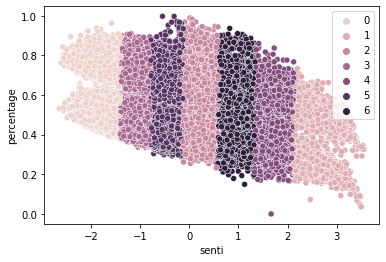

In [20]:
sns.scatterplot(data=X, x='senti', y='percentage', hue=kmeans.labels_)

In [21]:
#linear regression으로 senti랑 acoustic, instrumental 이 어떤 관계인지 알아보고 감정 mapping 시키기

In [22]:
acou_ins_senti = data.copy()

In [23]:
data_scaled.head()

,0,1
0,0.907486,-0.451379
1,1.562360,2.867686
2,0.469950,0.159358
3,0.258331,-0.450641
4,0.181119,-0.430694


In [24]:
data_scaled.columns=['acoustic', 'instru']

In [25]:
data_scaled.head()

,acoustic,instru
0,0.907486,-0.451379
1,1.562360,2.867686
2,0.469950,0.159358
3,0.258331,-0.450641
4,0.181119,-0.430694


In [26]:
linear = pd.concat([data_scaled, res], axis=1) #acou, inst, 차원축소결과

In [27]:
linear.head(3)

,acoustic,instru,senti
0,0.907486,-0.451379,0.322516
1,1.562360,2.867686,3.132515
2,0.469950,0.159358,0.444988


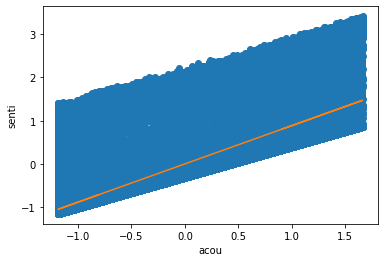

In [28]:
from sklearn.linear_model import LinearRegression

x = linear['acoustic']
y = linear['senti']

line = LinearRegression()
line.fit(x.values.reshape(-1,1),y)
plt.plot(x,y,'o')
plt.plot(x, line.predict(x.values.reshape(-1,1)))
plt.xlabel('acou')
plt.ylabel('senti')
plt.show()

In [30]:
line.coef_, line.intercept_

(array([0.88494464]), -1.8521918516695707e-16)

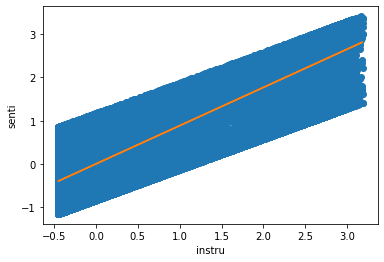

In [31]:
from sklearn.linear_model import LinearRegression

x = linear['instru']
y = linear['senti']

line = LinearRegression()
line.fit(x.values.reshape(-1,1),y)
plt.plot(x,y,'o')
plt.plot(x, line.predict(x.values.reshape(-1,1)))
plt.xlabel('instru')
plt.ylabel('senti')
plt.show()

In [32]:
line.coef_, line.intercept_

(array([0.88494464]), -5.364902707662437e-17)

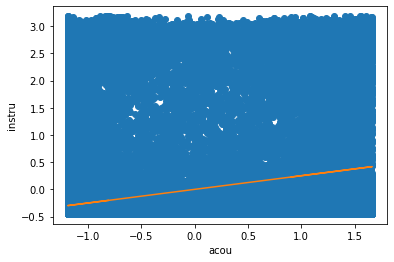

In [30]:
from sklearn.linear_model import LinearRegression

x = linear['acoustic']
y = linear['instru']

line = LinearRegression()
line.fit(x.values.reshape(-1,1),y)
plt.plot(x,y,'o')
plt.plot(x, line.predict(x.values.reshape(-1,1)))
plt.xlabel('acou')
plt.ylabel('instru')
plt.show()